In [43]:
import matplotlib.pyplot as plt

import numpy as np
import time
import itertools
import scipy.stats as stats

from ProbabilisticDiffusion import Diffusion
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
import sys

class ConditionalLinear(nn.Module):
    def __init__(self, num_in, num_out, n_steps):
        super(ConditionalLinear, self).__init__()
        self.num_out = num_out
        self.lin = nn.Linear(num_in, num_out)
        self.embed = nn.Embedding(n_steps, num_out)
        self.embed.weight.data.uniform_()

    def forward(self, x, y):
        out = self.lin(x)
        gamma = self.embed(y)
        out = gamma.view(-1, self.num_out) * out
        return out
class ConditionalModel(nn.Module):
    def __init__(self, n_steps):
        super(ConditionalModel, self).__init__()
        self.lin1 = ConditionalLinear(2, 128, n_steps)
        self.lin2 = ConditionalLinear(128, 128, n_steps)
        self.lin3 = nn.Linear(128, 2)
    
    def forward(self, x, y):
        x = F.softplus(self.lin1(x, y))
        x = F.softplus(self.lin2(x, y))
        return self.lin3(x)

def generate_cloud(n_a, n_b, a, a_scale, b, b_scale):
    x_a = np.random.normal(a[0], a_scale[0], n_a)
    y_a = np.random.normal(a[1], a_scale[1], n_a)
    x_b = np.random.normal(b[0], b_scale[0], n_b)
    y_b = np.random.normal(b[1], b_scale[1], n_b)
    a_ = np.stack((x_a, y_a), axis=1)
    b_ = np.stack((x_b, y_b), axis=1)
    data = np.vstack((a_,b_))
    return data

## Equally Weighted Data Clouds

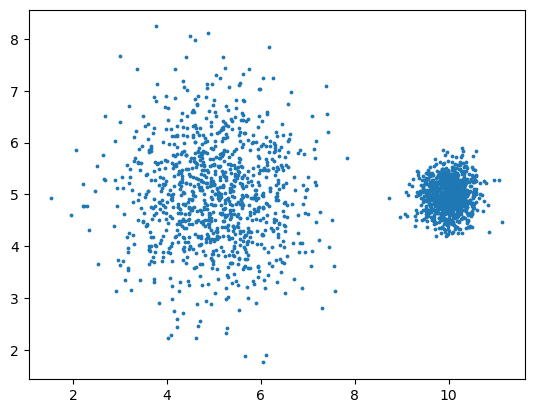

In [45]:
data = torch.tensor(generate_cloud(1000, 1000, [5,5], [1,1], [10, 5], [0.3,0.3]), dtype=torch.float)

plt.scatter(data[:,0], data[:,1], s=3)
plt.show()

In [65]:
n_steps=100
model = ConditionalModel(n_steps)
loss = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
diffusion = Diffusion(data, n_steps,
                 1e-4, 1e-1, 'linear',
                 model, loss, optimizer)

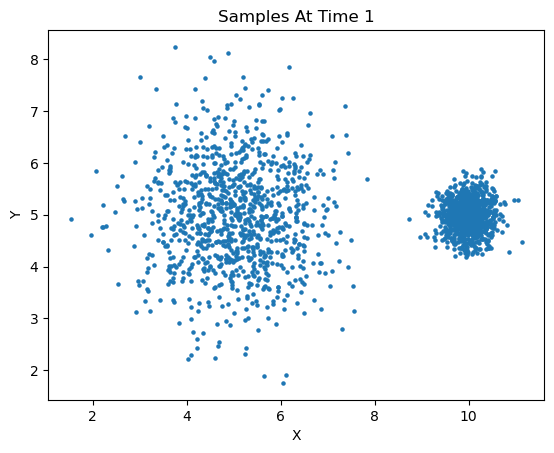

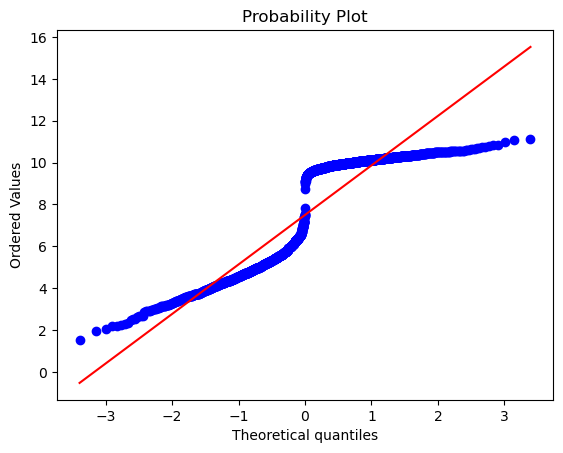

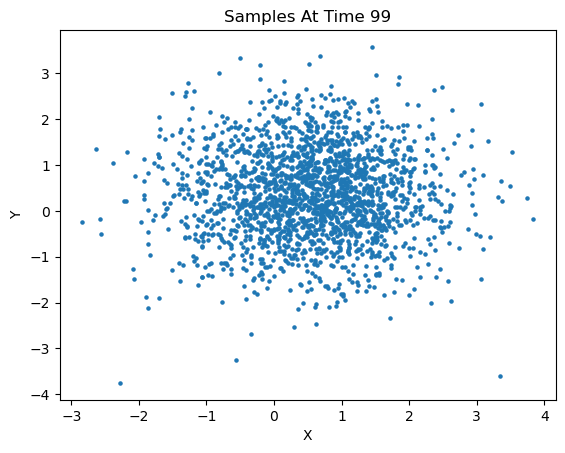

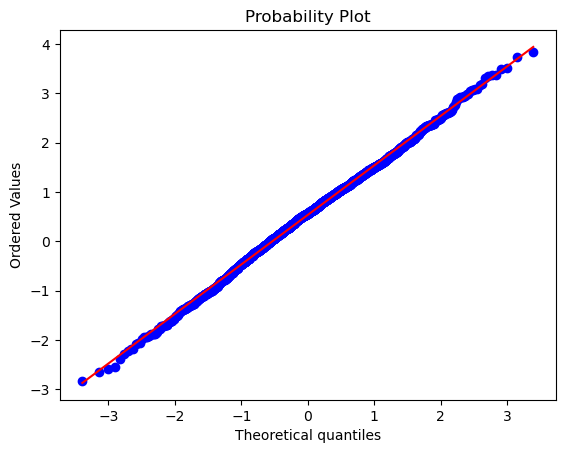

In [66]:
noised = diffusion.forward(1, s=5)
plt.show()
stats.probplot(noised[:,0], dist="norm", plot=plt)
plt.show()
noised = diffusion.forward(99, s=5)
plt.show()
stats.probplot(noised[:,0], dist="norm", plot=plt)
plt.show()

100%|█████████████████████████| 10000/10000 [08:24<00:00, 19.80it/s, loss=0.454]


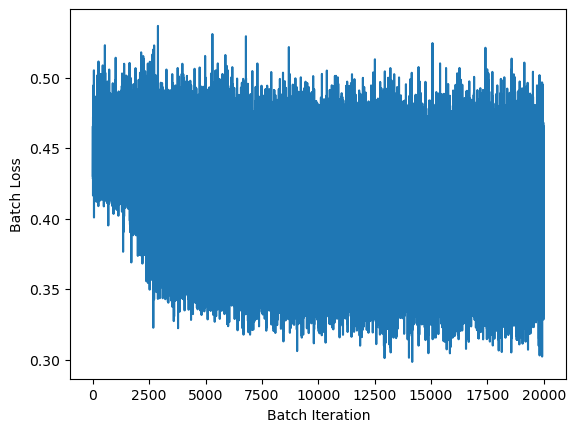

In [70]:
diffusion.train(1000, 10000)

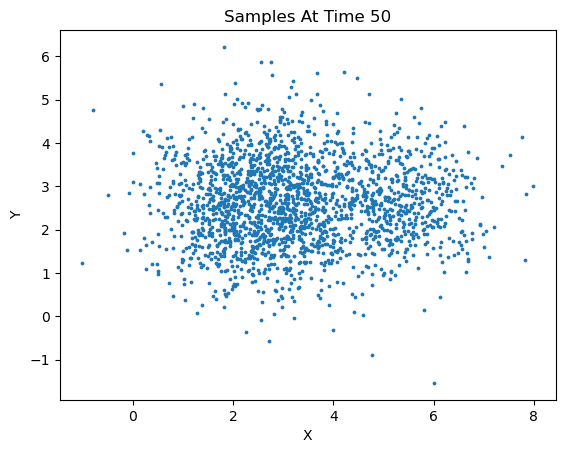

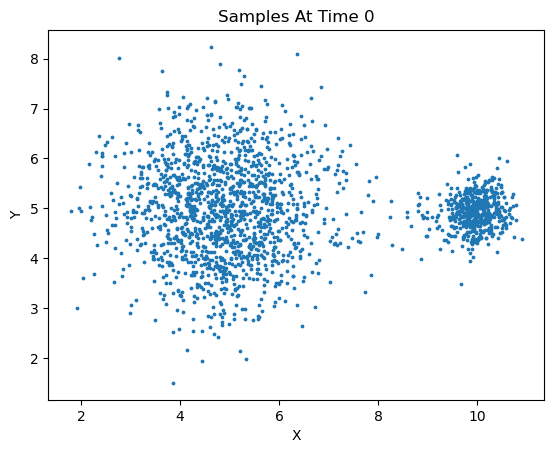

In [75]:
new_x = diffusion.sample(2000, 50, s=3)

## Unevenly Weighted Clouds

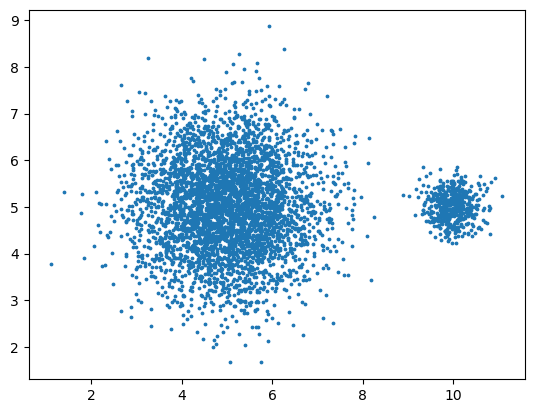

In [80]:
data = torch.tensor(generate_cloud(4000, 400, [5,5], [1,1], [10, 5], [0.3,0.3]), dtype=torch.float)

plt.scatter(data[:,0], data[:,1], s=3)
plt.show()

In [81]:
n_steps=100
model = ConditionalModel(n_steps)
loss = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
diffusion = Diffusion(data, n_steps,
                 1e-4, 1e-1, 'linear',
                 model, loss, optimizer)

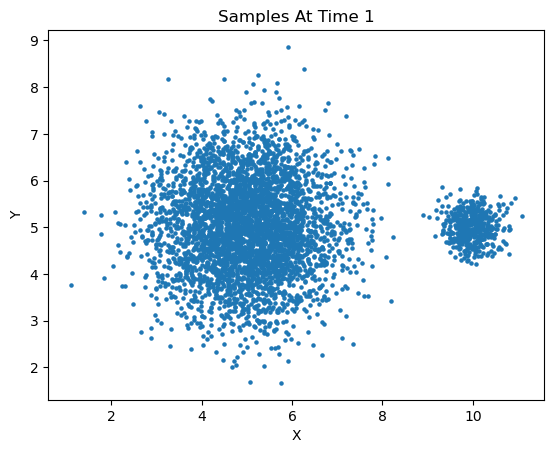

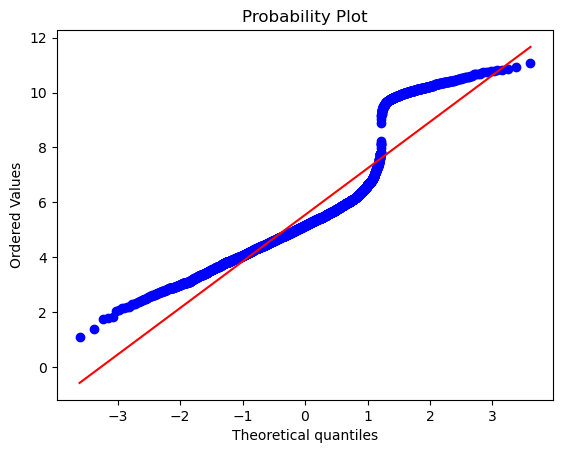

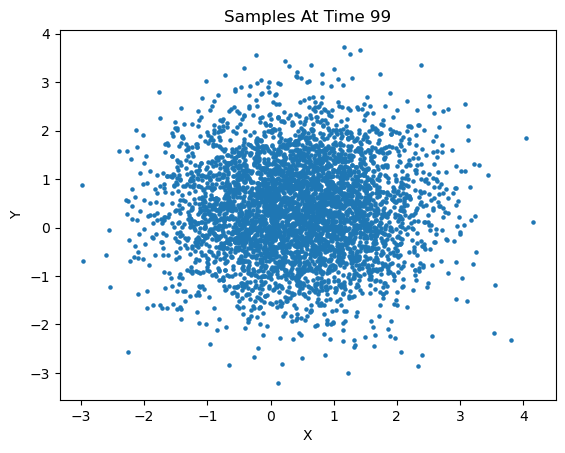

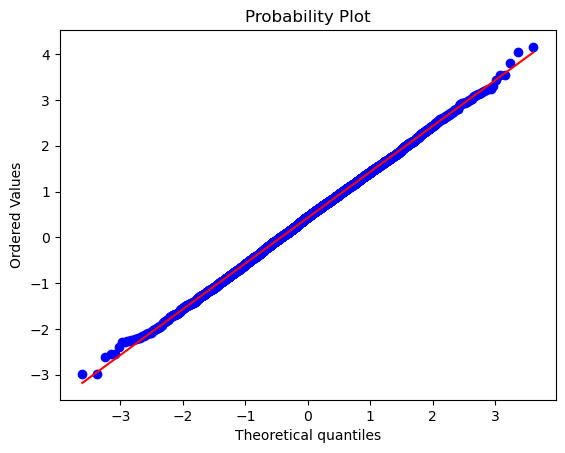

In [82]:
noised = diffusion.forward(1, s=5)
plt.show()
stats.probplot(noised[:,0], dist="norm", plot=plt)
plt.show()
noised = diffusion.forward(99, s=5)
plt.show()
stats.probplot(noised[:,0], dist="norm", plot=plt)
plt.show()

100%|█████████████████████████| 10000/10000 [34:35<00:00,  4.82it/s, loss=0.396]


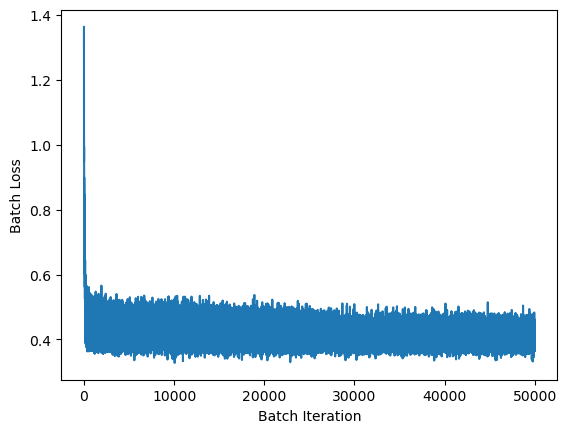

In [83]:
diffusion.train(1000, 10000)

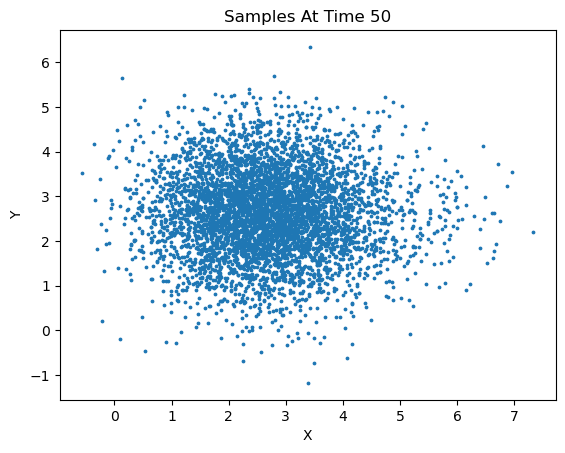

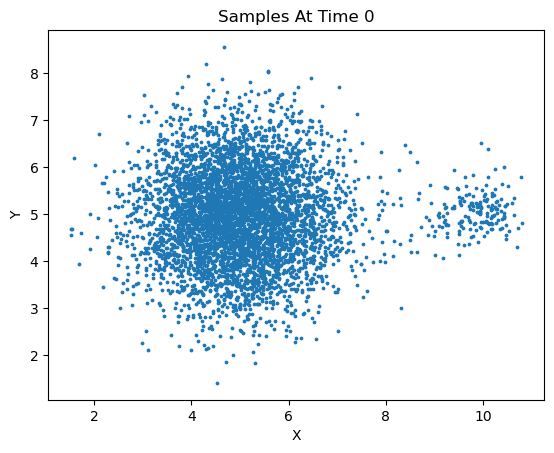

In [85]:
new_x = diffusion.sample(5000, 50, s=3)